# Week 4 Code Exploration of Century City

This assignment is used to review what sort of code we have learned over the past few weeks. In this document, I plot Century City, a component of our final project, to understand the layout/landscape of Century City. Additionally, I add a legend to reveal what sort of buildings exist, and also created a legend to reveal the age of the buildings. I later add a basemap and later review how to "subset"/specify what buildings to plot. I also explore our other datasets (LA Neigbhorhood Index) and look into which zipcodes have the greatest increase in rent. 

Here, we import the necessary modules to support our code.

In [77]:
# for data wrangling 
import pandas as pd

# for reading and visualizing spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# to download osm data
import osmnx as ox

Here, we set our arguments for ox.geometries_from_address to see what the building landscape is like in Century City.

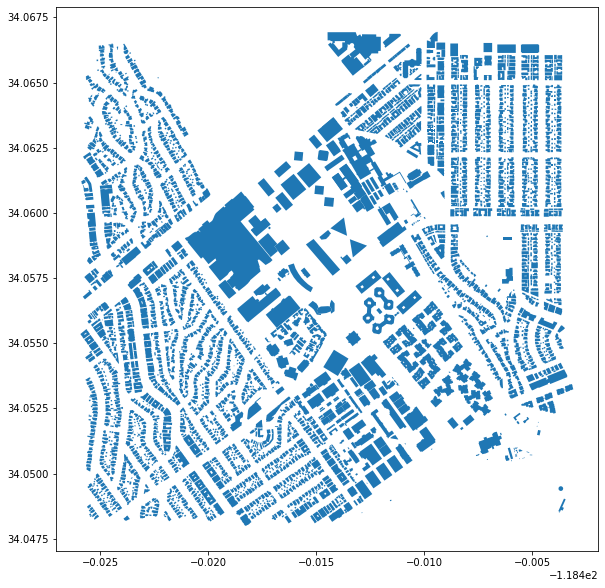

In [2]:
# location
address = 'Century City, California'

# tags for what type of data we are getting
tags = {'building':True}

# distance from location point in meters
dist = 1000 

# get the data from OSM 
osm = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

# quick plot
osm.plot(figsize=(10,10))

I think it would be interesting to understand what types of buildings exist here, so I will plot in the following cell, side-by-side.

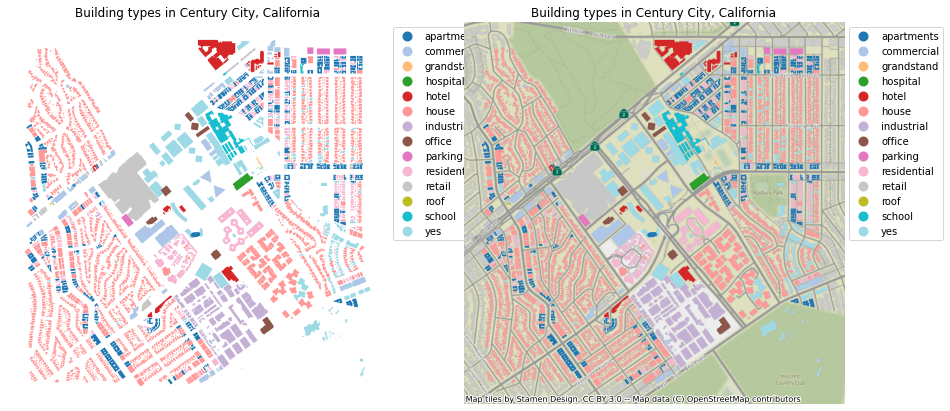

In [17]:
#### without basemap

# use subplots to set up the canvas
fig, ax = plt.subplots(1,2,figsize=(15,15))

# create the map plot
osm.plot(ax = ax[0],
         figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

# add a title
ax[0].set_title('Building types in ' + address)

# get rid of the axis
ax[0].axis('off')

#### adding basemap

# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

# set up the plot
# add layer

osm_web_mercator.plot(ax=ax[1],
                        column='building',
                        cmap='tab20',
                        legend=True,
                        legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

# no axis
ax[1].axis('off')
ax[1].set_title('Building types in ' + address)

#plot with basemap
ctx.add_basemap(ax[1])

I plot the map with and without the base map to compare how the code is constructed.

# What is the most common kind of building in Century City?

Here I count the values for each builidng, and rename yes to unassigned.

In [24]:
osm.building.value_counts()
# replace 'yes'
osm.loc[osm['building']=='yes','building'] = 'unassigned'
osm_building_counts = osm.building.value_counts().reset_index() #reset_index() makes it a dataframe
osm_building_counts = osm_building_counts.rename(columns={'index':'building_type','building':'count'}) #rename the columns properly
osm_building_counts = osm_building_counts.sort_values(by='count', ascending=True) #sort ascending so that we can do the top 10

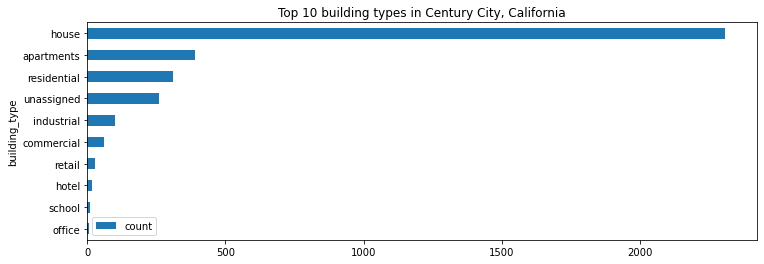

In [23]:
osm_building_counts[-10:].plot.barh(figsize=(12,4),
                                      x='building_type',
                                      y='count',
                                      title="Top 10 building types in "+address)

The most common type of building in Century City are houses.

# Plotting the buildings and coloring them by the date they were built
My aim for the future is to see if the age of a building will affect the median household income, or other factors that are more directly related, like property value.

Here, I use .info() to determine what sort of information I can focus on. I will later set one of these factors to be a part of the legend.

In [24]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3504 entries, 0 to 3503
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   unique_id           3504 non-null   object  
 1   osmid               3504 non-null   int64   
 2   element_type        3504 non-null   object  
 3   amenity             16 non-null     object  
 4   geometry            3504 non-null   geometry
 5   parking             10 non-null     object  
 6   name                124 non-null    object  
 7   note                1 non-null      object  
 8   access              2 non-null      object  
 9   nodes               3504 non-null   object  
 10  building            3504 non-null   object  
 11  addr:city           588 non-null    object  
 12  addr:housenumber    590 non-null    object  
 13  addr:postcode       589 non-null    object  
 14  addr:state          583 non-null    object  
 15  addr:street         590 non-nu

Start date seems to have a lot of non-null values, so I will use that to set my legend.

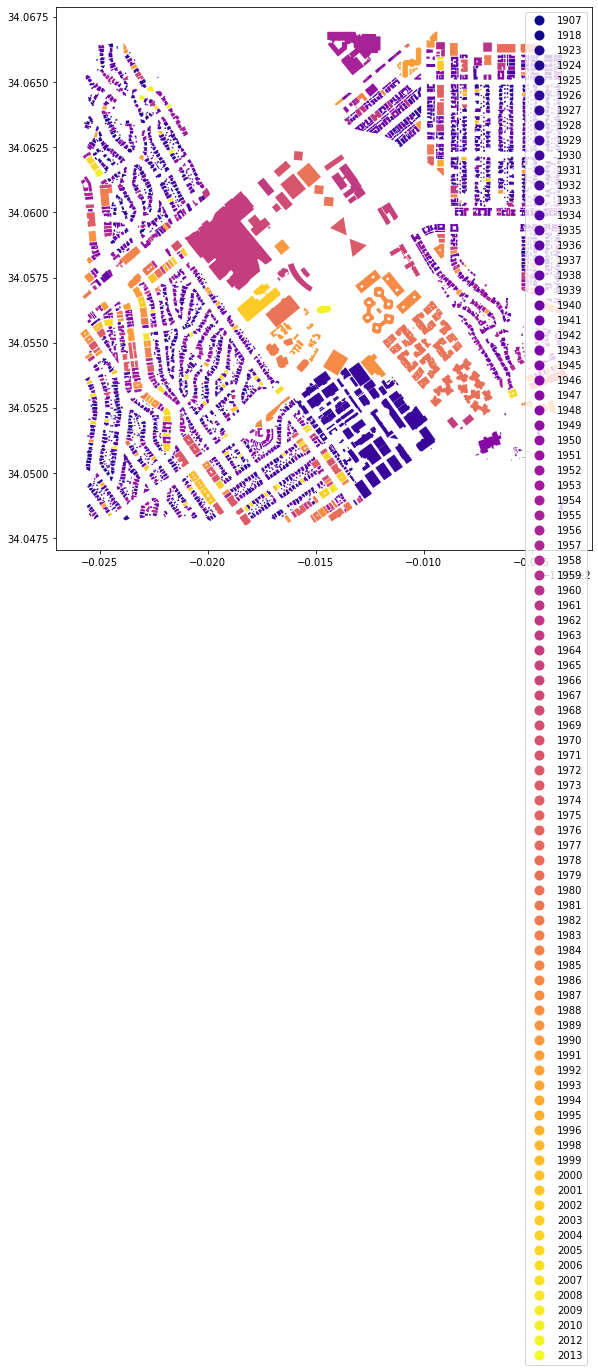

In [35]:
osm.plot(figsize=(10,10),
         column='start_date',
         cmap='plasma',
         legend=True)

I would like to shorten the legend and perhaps make it continuous instead of discrete, but could not find a way to do this.

Perhaps by mapping Century City and Bel Air and coloring them by age, and then comparing them to Ktown/Downtown, we can see which city is older and see if age contributes to the median household income (though I am doubtful that we can to prove any sort of causal relationship or even correlational).

# Limiting what sort of buildings we plot to just residential, apartments, etc

The tags used were by wikipedia's suggestion as to what "residential" entails. I did this to practice "subsetting" the plots, and gaining deeper understanding as to how tags arae used and how they should be formatted in code.

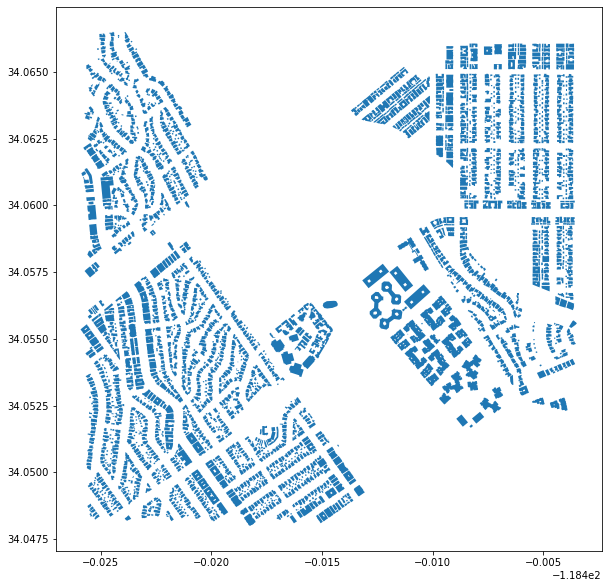

In [33]:
 # location
address = 'Century City, California'

# tags for what type of data we are getting
tags={'building': ['residential','apartments','terrace', 'house', 'detached','semidetached_house']}

# distance from location point in meters
dist = 1000 

# get the data from OSM 
osm3 = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

# quick plot
osm3.plot(figsize=(10,10))


For some reason, only including residential only plots some of the buildings despite the previous maps plotting much more of "residential" according to the legend. 

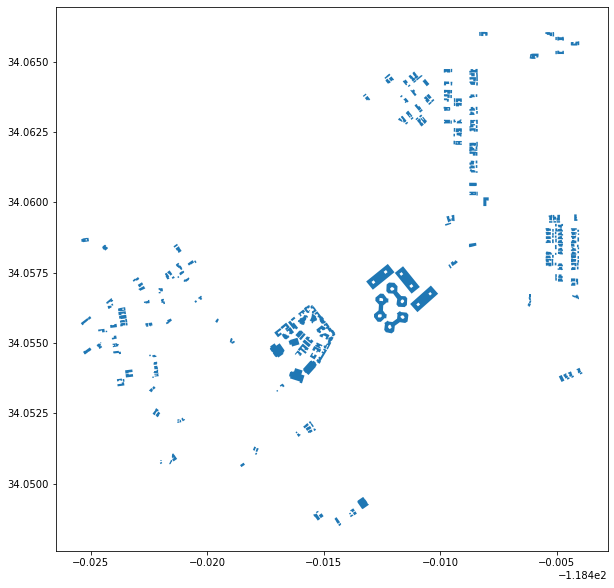

In [37]:
 # location
address = 'Century City, California'

# tags for what type of data we are getting
tags={'building': ['residential']}

# distance from location point in meters
dist = 1000 

# get the data from OSM 
osm2 = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

# quick plot
osm2.plot(figsize=(10,10))


# Exploring the LA Neighborhood Index dataset

First, we load our data and use info() to see what sort of columns there are

In [81]:
# load a data file
la_index = gpd.read_file('data/Los_Angeles_Index_of_Neighborhood_Change.geojson')
#century_city = la_index[la_index.zipcode == "90067"]
la_index.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   FID           155 non-null    int64   
 1   zipcode       155 non-null    object  
 2   Rank          155 non-null    int64   
 3   Neighborho    155 non-null    object  
 4   IRS_Ratio     155 non-null    float64 
 5   HH_Size       155 non-null    float64 
 6   Per_White     155 non-null    float64 
 7   Per_Colleg    155 non-null    float64 
 8   Rent          155 non-null    float64 
 9   Index_Scor    155 non-null    float64 
 10  IRS_Rati_1    155 non-null    float64 
 11  IRS_Rati_2    155 non-null    float64 
 12  HH_Incom_2    155 non-null    int64   
 13  HH_Size_20    155 non-null    float64 
 14  HH_Size_21    155 non-null    float64 
 15  Percent_Wh    155 non-null    float64 
 16  Percent__1    155 non-null    float64 
 17  College_Pe    155 non-null    float64 
 18  Co

I am going to find the top 10 areas (by zipcode) that have the highest rent increase. First we convert our la_index object into a dataframe.

In [82]:
la_index = la_index.reset_index()

Then I sort the values by Rent (decreasing) and only keep the first 10

In [83]:
#la_index["Rent"]

top_10_increase_rent = la_index.sort_values(by=['Rent'], ascending = False)
top_10_increase_rent = top_10_increase_rent.head(10)
top_10_increase_rent

,index,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,...,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry
12,12,13,90014,1,Downtown,-58.747,7.317,26.815,29.511,108.064,...,615,11868.38941,44.366682,3518,6659,89.3,Yes,0.045286,0.000072,"MULTIPOLYGON (((-118.25466 34.04861, -118.2544..."
8,8,9,90010,22,Koreatown,14.734,-12.376,-24.633,9.410,101.817,...,1637,44106.74591,7.257969,1943,3792,95.2,Yes,0.132999,0.000041,"MULTIPOLYGON (((-118.28423 34.06176, -118.2842..."
11,11,12,90013,2,Downtown/Arts District,-37.339,-1.550,5.306,19.560,74.469,...,686,12173.58835,73.490341,9727,10575,8.7,Yes,0.077073,0.000153,"MULTIPOLYGON (((-118.22937 34.04154, -118.2292..."
15,15,16,90017,3,Westlake/Downtown,-55.714,-18.627,8.944,18.207,59.384,...,848,20411.21019,2.928733,20689,23719,14.6,Yes,0.074841,0.000180,"MULTIPOLYGON (((-118.26833 34.06127, -118.2681..."
85,85,86,91326,87,Porter Ranch/Chatsworth,14.536,2.778,-11.255,4.308,54.741,...,1787,113157.31870,-12.660532,28049,36024,28.4,Yes,0.249668,0.001999,"MULTIPOLYGON (((-118.54083 34.29882, -118.5405..."
65,65,66,90291,9,Venice,-34.441,-3.030,6.583,14.551,47.363,...,1718,62921.84813,28.770852,31018,27803,-10.4,Yes,0.116813,0.000586,"MULTIPOLYGON (((-118.44521 33.99420, -118.4452..."
13,13,14,90015,4,Downtown/Pico Union,-72.601,-16.892,5.964,13.476,46.151,...,866,25478.61241,13.636487,15134,18226,20.4,Yes,0.113942,0.000423,"MULTIPOLYGON (((-118.27482 34.05184, -118.2747..."
10,10,11,90012,7,Chinatown/Arts District,-48.230,-4.741,3.890,14.298,43.928,...,1116,27704.36504,6.452539,30577,30029,-1.8,Yes,0.165165,0.000898,"MULTIPOLYGON (((-118.22747 34.05511, -118.2289..."
86,86,87,91331,39,Pacoima/Arleta,-41.951,1.101,-2.580,2.293,42.606,...,1292,53925.35325,-4.785047,97300,102367,5.2,Yes,0.264770,0.002156,"MULTIPOLYGON (((-118.39552 34.27215, -118.3968..."
40,40,41,90045,53,Westchester,-17.085,1.261,-0.975,11.399,42.277,...,1690,77765.23982,0.407329,39315,41453,5.4,Yes,0.285250,0.002720,"MULTIPOLYGON (((-118.39730 33.98190, -118.3971..."


Here, we create a bar plot showing the top 10 zipcodes with greatest increase in rent. 

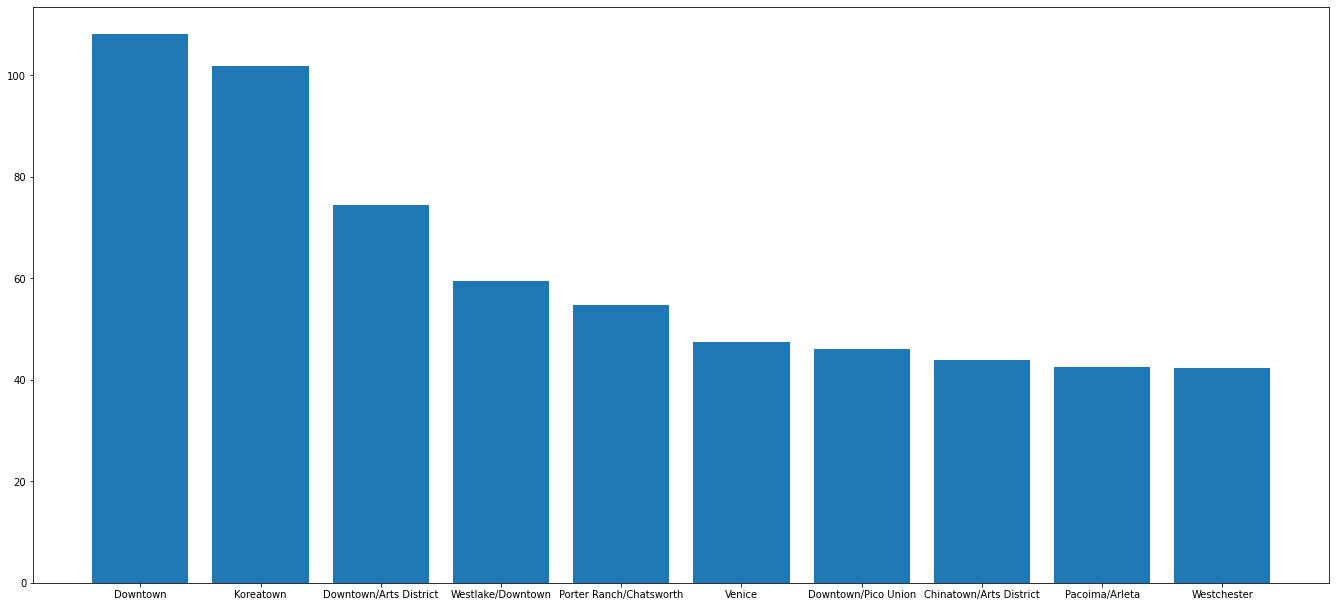

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
langs = top_10_increase_rent["Neighborho"]
students = top_10_increase_rent["Rent"]
ax.bar(langs,students)
plt.show()